In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.dropna(inplace=True)

In [4]:
target=df['Survived']

In [5]:
target

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

In [6]:
inputs = df.drop(['PassengerId','SibSp','Name','Parch','Ticket','Cabin','Embarked','Survived'],axis='columns')

In [7]:
inputs

,Pclass,Sex,Age,Fare
1,1,female,38.0,71.2833
3,1,female,35.0,53.1000
6,1,male,54.0,51.8625
10,3,female,4.0,16.7000
11,1,female,58.0,26.5500
...,...,...,...,...
871,1,female,47.0,52.5542
872,1,male,33.0,5.0000
879,1,female,56.0,83.1583
887,1,female,19.0,30.0000


In [8]:
from sklearn.preprocessing import LabelEncoder
le_Sex = LabelEncoder()

In [9]:
inputs['sex_n'] = le_Sex.fit_transform(inputs['Sex'])
inputs

,Pclass,Sex,Age,Fare,sex_n
1,1,female,38.0,71.2833,0
3,1,female,35.0,53.1000,0
6,1,male,54.0,51.8625,1
10,3,female,4.0,16.7000,0
11,1,female,58.0,26.5500,0
...,...,...,...,...,...
871,1,female,47.0,52.5542,0
872,1,male,33.0,5.0000,1
879,1,female,56.0,83.1583,0
887,1,female,19.0,30.0000,0


In [10]:
inputs_n = inputs.drop('Sex',axis='columns')

In [11]:
inputs_n

,Pclass,Age,Fare,sex_n
1,1,38.0,71.2833,0
3,1,35.0,53.1000,0
6,1,54.0,51.8625,1
10,3,4.0,16.7000,0
11,1,58.0,26.5500,0
...,...,...,...,...
871,1,47.0,52.5542,0
872,1,33.0,5.0000,1
879,1,56.0,83.1583,0
887,1,19.0,30.0000,0


In [12]:
from sklearn.model_selection import train_test_split

In [121]:
input_train,input_test,target_train,target_test=train_test_split(inputs_n,target,test_size=0.2,random_state=65)

In [122]:
input_train

,Pclass,Age,Fare,sex_n
625,1,61.0,32.3208,1
435,1,14.0,120.0000,0
887,1,19.0,30.0000,0
742,1,21.0,262.3750,0
66,2,29.0,10.5000,0
...,...,...,...,...
341,1,24.0,263.0000,0
245,1,44.0,90.0000,1
327,2,36.0,13.0000,0
577,1,39.0,55.9000,0


In [123]:
input_test

,Pclass,Age,Fare,sex_n
332,1,38.0,153.4625,1
193,2,3.0,26.0000,1
136,1,19.0,26.2833,0
318,1,31.0,164.8667,0
369,1,24.0,69.3000,0
356,1,22.0,55.0000,0
337,1,41.0,134.5000,0
516,2,34.0,10.5000,0
75,3,25.0,7.6500,1
205,3,2.0,10.4625,0


In [124]:
target_train

625    0
435    1
887    1
742    1
66     1
      ..
341    1
245    0
327    1
577    1
263    0
Name: Survived, Length: 146, dtype: int64

In [125]:
target_test

332    0
193    1
136    1
318    1
369    1
356    1
337    1
516    1
75     0
205    0
292    0
123    1
449    1
699    0
544    0
325    1
700    1
867    0
806    0
124    0
779    1
370    1
262    0
763    1
765    1
520    1
345    1
690    1
430    1
789    0
460    1
331    0
456    0
802    1
540    1
10     1
54     0
Name: Survived, dtype: int64

In [126]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [127]:
model.fit(input_train, target_train)

DecisionTreeClassifier()

In [128]:
model.score(input_test,target_test)

0.8648648648648649

In [129]:
target

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

In [130]:
model.predict([[1,38.0,71.2833,0]])

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [131]:
import matplotlib.pyplot as plt

In [132]:
train_pred=model.predict(input_train)
test_pred=model.predict(input_test)

In [133]:
train_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [134]:
test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

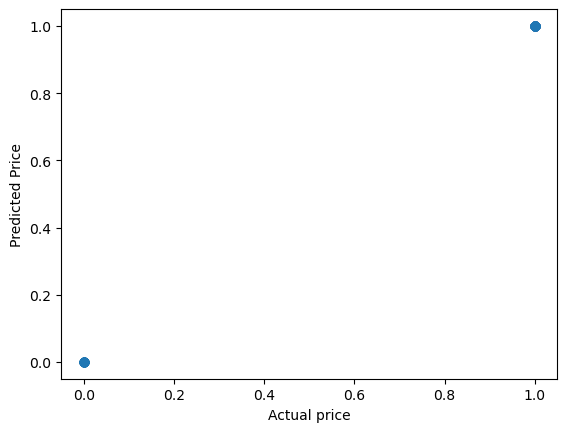

In [137]:
plt.scatter(train_pred, target_train)
plt.xlabel("Actual price")
plt.ylabel("Predicted Price")
plt.show()

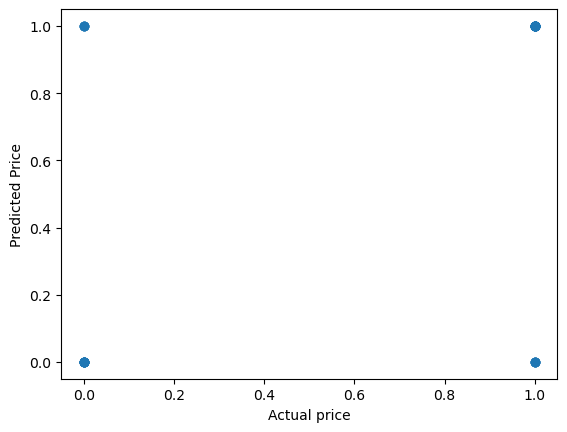

In [29]:
plt.scatter(test_pred, target_test)
plt.xlabel("Actual price")
plt.ylabel("Predicted Price")
plt.show()